In [1]:
import pandas as pd
import sklearn.metrics as m
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
# Run this line if you are in local

dataset = pd.read_csv('Dataset-Deseased.csv', delimiter= ';')
dataset

FileNotFoundError: ignored

In [3]:
# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1bVq_iToB5eqeNmah5h2qNMjzW-C-xFjJ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path, delimiter = ';')
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,deceased
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,0
1,1,48,305,257,85,279,331,25400,200,0
2,0,68,310,249,86,277,345,24690,177,0
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,0
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,0
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,0
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,0
4689,1,42,"4,44","35,3",12,27,34,7940,202,0


In [4]:
dataset = dataset.replace(',', '.', regex = True)

In [5]:
x = dataset.drop('deceased', axis = 1)
y = dataset.deceased
y

0       0
1       0
2       0
3       0
4       0
       ..
4686    0
4687    0
4688    0
4689    0
4690    0
Name: deceased, Length: 4691, dtype: int64

In [6]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,train_size=0.5)
print(len(Y_train))
print(len(Y_test))

2345
2346


In [7]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,train_size=0.5)
print(len(Y_train))
print(len(Y_test))

NegativeValue = Y_train[Y_train == 0].count();
positiveValue = Y_train[Y_train == 1].count()
print('tn = {}'.format(NegativeValue))
print('tp = {}'.format(positiveValue))

2345
2346
tn = 2237
tp = 108


In [8]:
weight = {0:NegativeValue, 1:positiveValue}
svm = SVC(kernel='linear', probability= True, class_weight= weight);

In [9]:
svm.fit(X_train, Y_train)

SVC(class_weight={0: 2237, 1: 108}, kernel='linear', probability=True)

In [10]:
prediction = svm.predict(X_train)

print("Confusion matrix for train set")
print(m.confusion_matrix(Y_train, prediction))
print("Accuracy",m.accuracy_score(Y_train,prediction))
print("precision = ", m.precision_score(Y_train, prediction, average="weighted"))
print("F Measure",m.f1_score(Y_train,prediction))
print("Recall",m.recall_score(Y_train,prediction), "\n")

predictions = svm.predict(X_test)
print("Confusion matrix for test set")
print(m.confusion_matrix(Y_test, predictions))
print("Accuracy",m.accuracy_score(Y_test,predictions))
print("Precision",m.precision_score(Y_test,predictions, average='weighted'))
print("F Measure",m.f1_score(Y_test,predictions))
print("Recall",m.recall_score(Y_test,predictions))

Confusion matrix for train set
[[2235    2]
 [ 106    2]]
Accuracy 0.9539445628997868
precision =  0.9337778672391385
F Measure 0.03571428571428571
Recall 0.018518518518518517 

Confusion matrix for test set
[[2238    3]
 [ 105    0]]
Accuracy 0.9539641943734015
Precision 0.9124343830946618
F Measure 0.0
Recall 0.0


In [11]:
# Prediction 
predictions = svm.predict(X_test)

# model accuracy
print("Accuracy: ", m.accuracy_score(Y_test, predictions))

# Classification report: Precision, recall, f1, support, accuracy
print('\nClassification Report')
report = m.classification_report(Y_test, predictions)
print(report)

Accuracy:  0.9539641943734015

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2241
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2346
   macro avg       0.48      0.50      0.49      2346
weighted avg       0.91      0.95      0.93      2346



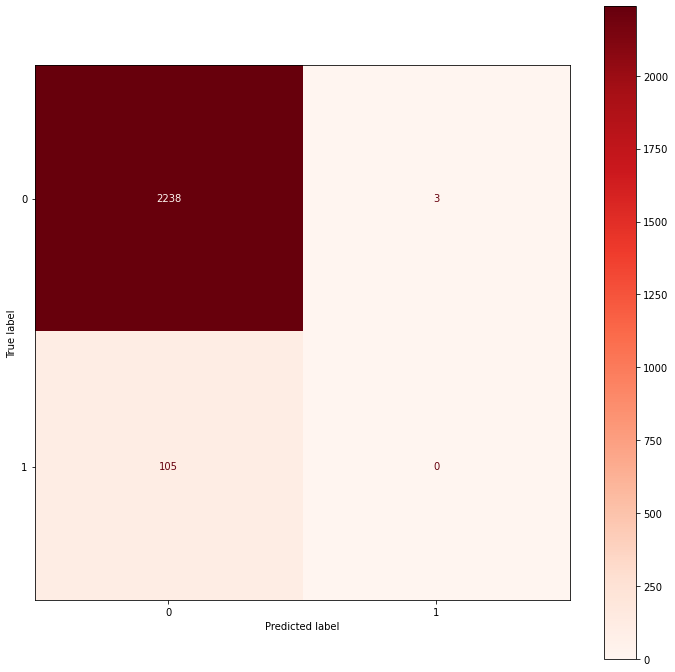

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,12));
cm = m.confusion_matrix(Y_test, predictions)


m.ConfusionMatrixDisplay(cm).plot(ax=ax, cmap = "Reds")

In [14]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(svm, x, y, cv=5, scoring='accuracy')

print("cv results of five-folds:")
print(cv_results)
print()
print("The mean accuracy and the standard deviation are hence given by:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_results.mean(), cv_results.std()))

cv results of five-folds:
[0.95314164 0.95415778 0.95309168 0.95415778 0.95415778]

The mean accuracy and the standard deviation are hence given by:
0.95 accuracy with a standard deviation of 0.00


In [ ]:
# svm = SVC(kernel='linear', probability= True)

In [ ]:
# svm.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# prediction = svm.predict(X_train)

# print("Confusion matrix for train set")
# print(m.confusion_matrix(Y_train, prediction))
# print("Accuracy",m.accuracy_score(Y_train,prediction))
# print("precision = ", m.precision_score(Y_train, prediction, average="weighted"))
# print("F Measure",m.f1_score(Y_train,prediction))
# print("Recall",m.recall_score(Y_train,prediction), "\n")

# predictions = svm.predict(X_test)
# print("Confusion matrix for test set")
# print(m.confusion_matrix(Y_test, predictions))
# print("Accuracy",m.accuracy_score(Y_test,predictions))
# print("Precision",m.precision_score(Y_test,predictions, average='weighted'))
# print("F Measure",m.f1_score(Y_test,predictions))
# print("Recall",m.recall_score(Y_test,predictions))

Confusion matrix for train set
[[2241    0]
 [ 102    2]]
Accuracy 0.956503198294243
precision =  0.9583967850522401
F Measure 0.03773584905660378
Recall 0.019230769230769232 

Confusion matrix for test set
[[2233    4]
 [ 109    0]]
Accuracy 0.9518329070758739
Precision 0.9091589296023612
F Measure 0.0
Recall 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


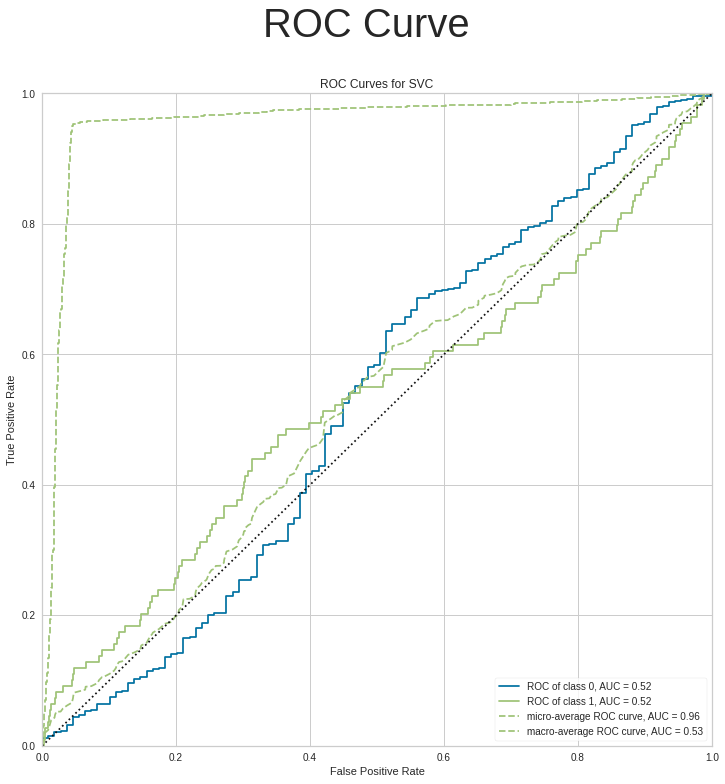

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
curve = roc_auc(svm, X_train, Y_train, X_test = X_test, y_test = Y_test, classes=[0,1], ax = ax)
fig.savefig('svc-deceased-ROC-AUC.pdf')